<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/heatmap_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install ipdb

In [17]:
from fastai import *
from fastai.vision import *

In [18]:
from ipdb import set_trace as st

In [4]:
from fastai.datasets import untar_data
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [19]:
(path/'images').ls()[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_73.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_91.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_176.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_144.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_122.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_49.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_15.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_133.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_62.jpg')]

In [20]:
x = (path/'images').ls()[10]
'chihuahua_73'.rsplit('_', 1)

['chihuahua', '73']

In [34]:
def get_label(im_path):
  return im_path.stem.rsplit('_', 1)[0]

In [42]:
from fastai.vision.transform import get_transforms
from fastai.vision.data import ImageList
data = ImageList.from_folder(path/'images').split_by_rand_pct(.2).label_from_func(get_label).transform(get_transforms(), size = 224).databunch(bs = 64)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [43]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,keeshond,english_setter,Russian_Blue,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,chihuahua,pomeranian,miniature_pinscher,scottish_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [54]:
x, y = next(iter(data.valid_dl))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

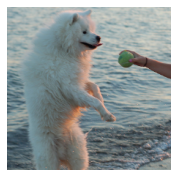

In [56]:
img = Image(x[22])
img.show()

In [57]:
test = x[22][None]
test.shape

torch.Size([1, 3, 224, 224])

In [58]:
mod = models.resnet34

In [61]:
resnet = mod()

In [63]:
yhat = resnet(test)
yhat.shape

torch.Size([1, 1000])

In [100]:
conv = nn.Conv2d(3, 64, kernel_size=10, stride=1)
yhat = conv(test)

In [101]:
avg_acts = torch.mean(yhat[0], dim = 0)

In [102]:
avg_acts.detach_()

tensor([[-0.0615, -0.0606, -0.0601,  ..., -0.0712, -0.0716, -0.0719],
        [-0.0630, -0.0626, -0.0618,  ..., -0.0714, -0.0708, -0.0717],
        [-0.0628, -0.0625, -0.0618,  ..., -0.0713, -0.0724, -0.0742],
        ...,
        [-0.0356, -0.0380, -0.0370,  ..., -0.0584, -0.0549, -0.0551],
        [-0.0345, -0.0366, -0.0390,  ..., -0.0552, -0.0582, -0.0574],
        [-0.0381, -0.0363, -0.0397,  ..., -0.0508, -0.0540, -0.0562]])

In [98]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    img.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');

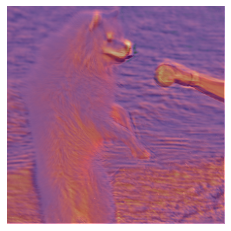

In [103]:
show_heatmap(avg_acts)

In [89]:
from fastai.vision.learner import cnn_learner
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [104]:
enc = learn.model[0]
yhat = enc(test)
yhat.shape

torch.Size([1, 512, 7, 7])

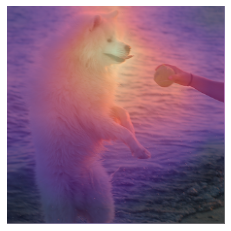

In [105]:
avg_acts = torch.mean(yhat[0], dim = 0)
show_heatmap(avg_acts.detach_())

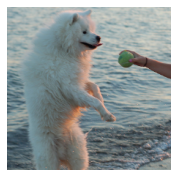

In [106]:
Image(test[0]).show()

In [ ]:
#hoookss